In [21]:
from pathlib import Path
import os
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from operator import itemgetter

In [6]:
ft=pd.DataFrame({'color':[1,2,2,1,3],'darkness':[2,3,4,1,1],'flower':[0,0,1,0,1],'gender':[0,0,0,1,1],'shirt-style':[0,1,0,0,1]})

In [7]:
ft

,color,darkness,flower,gender,shirt-style
0,1,2,0,0,0
1,2,3,0,0,1
2,2,4,1,0,0
3,1,1,0,1,0
4,3,1,1,1,1


In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.decomposition import PCA
import matplotlib.image as mpimg 
import cv2

In [25]:
# Read Images 
img1 = cv2.imread('1.png',cv2.IMREAD_GRAYSCALE) 
img2 = cv2.imread('2.png',cv2.IMREAD_GRAYSCALE)  
img3 = cv2.imread('3.png',cv2.IMREAD_GRAYSCALE)  
img4 = cv2.imread('4.png',cv2.IMREAD_GRAYSCALE) 
img5 = cv2.imread('5.png',cv2.IMREAD_GRAYSCALE) 
# cv2.imshow('gray',img1)
print(img1.shape)
print(img2.shape)
print(img3.shape)
print(img4.shape)
print(img5.shape)
# print(img1.size)
# cv2.waitKey()

(177, 118)
(215, 178)
(215, 143)
(196, 157)
(196, 111)


In [30]:
img1r=cv2.resize(img1, (178,215), interpolation = cv2.INTER_AREA)
img2r=cv2.resize(img2, (178,215), interpolation = cv2.INTER_AREA)
img3r=cv2.resize(img3, (178,215), interpolation = cv2.INTER_AREA)
img4r=cv2.resize(img4, (178,215), interpolation = cv2.INTER_AREA)
img5r=cv2.resize(img5, (178,215), interpolation = cv2.INTER_AREA)
print(img1r.shape)
print(img2r.shape)
print(img3r.shape)
print(img4r.shape)
print(img5r.shape)

(215, 178)
(215, 178)
(215, 178)
(215, 178)
(215, 178)


In [47]:
img1=np.reshape(img1r,(1,215*178))/255
img2=np.reshape(img2r,(1,215*178))/255
img3=np.reshape(img3r,(1,215*178))/255
img4=np.reshape(img4r,(1,215*178))/255
img5=np.reshape(img5r,(1,215*178))/255
img=np.vstack((img1,img2,img3,img4,img5))

In [32]:
# standardize inputs
# scaler = StandardScaler()
# scaler.fit(img)
# Apply transform to both the training set and the test set.
# img = scaler.transform(img)

In [48]:
n_components = 0.95
pca = PCA(n_components)
pimg = pca.fit_transform(img)

Text(0.5, 1.0, 'Incremental variance explained by PC')

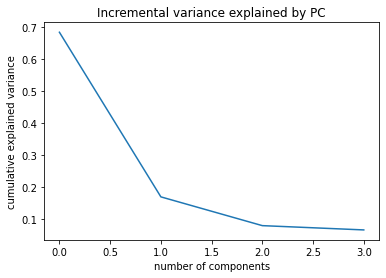

In [49]:
# plot incremental variance explained
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title('Incremental variance explained by PC')

Text(0.5, 1.0, 'Cumulative variance explained by PC')

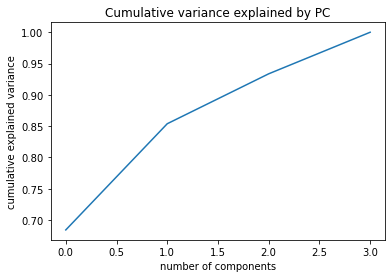

In [50]:
# plot cumulative variance explained
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title('Cumulative variance explained by PC')

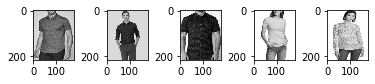

In [66]:
plt.subplot(1, 5, 1)
plt.imshow(pca.inverse_transform(pimg[0]).reshape(215, 178)*255,
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255))
plt.subplot(1, 5, 2)
plt.imshow(pca.inverse_transform(pimg[1]).reshape(215, 178)*255,
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255))
plt.subplot(1, 5, 3)
plt.imshow(pca.inverse_transform(pimg[2]).reshape(215, 178)*255,
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255))
plt.subplot(1, 5, 4)
plt.imshow(pca.inverse_transform(pimg[3]).reshape(215, 178)*255,
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255))
plt.subplot(1, 5, 5)
plt.imshow(pca.inverse_transform(pimg[4]).reshape(215, 178)*255,
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255))
plt.subplots_adjust(wspace =0.8) #, hspace =0
#plt.xlabel('{} components'.format(pca.n_components_), fontsize = 14)
#plt.title('95% of Explained Variance', fontsize = 20)

In [67]:
pimg

array([[ 21.18147504,  -9.65669942,  22.49155662, -12.08819376],
       [ -2.82128132,  40.10399035,   2.11636221,   3.64541566],
       [ 65.75908558,  -8.66593973, -14.47658685,   4.86067179],
       [-44.82525327,  -5.72658939, -15.08395796, -15.81069808],
       [-39.29402604, -16.05476181,   4.95262598,  19.39280438]])

In [3]:
img1 = cv2.imread('1.png') 
img2 = cv2.imread('2.png')  
img3 = cv2.imread('3.png')  
img4 = cv2.imread('4.png') 
img5 = cv2.imread('5.png') 

In [4]:
img1r=cv2.resize(img1, (178,215), interpolation = cv2.INTER_AREA).flatten()
img2r=cv2.resize(img2, (178,215), interpolation = cv2.INTER_AREA).flatten()
img3r=cv2.resize(img3, (178,215), interpolation = cv2.INTER_AREA).flatten()
img4r=cv2.resize(img4, (178,215), interpolation = cv2.INTER_AREA).flatten()
img5r=cv2.resize(img5, (178,215), interpolation = cv2.INTER_AREA).flatten()

img1r.shape, img2r.shape, img3r.shape, img4r.shape, img5r.shape

((114810,), (114810,), (114810,), (114810,), (114810,))

In [5]:
img=np.vstack((img1r,img2r,img3r,img4r,img5r))
img = img/255.0

In [6]:
n_components = 0.95
pca = PCA(n_components)
pimg = pca.fit_transform(img)

Text(0.5, 1.0, 'Cumulative variance explained by PC')

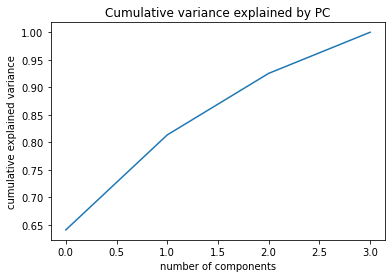

In [14]:
# plot cumulative variance explained
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title('Cumulative variance explained by PC')

In [7]:
pimg

array([[ 35.96816225, -32.15779801,  49.44689998,  -5.99327363],
       [ -6.00095796,  70.23782533,  12.24567665,  -5.25905768],
       [112.81586158,  -5.95060844, -32.5955344 ,   7.68449537],
       [-77.21449249, -12.26129011,  -5.53098619,  38.55319565],
       [-65.56857338, -19.86812877, -23.56605604, -34.9853597 ]])

In [9]:
cosine_sim=cosine_similarity(pimg,pimg)
cosine_sim

array([[ 1.        , -0.36934903,  0.31713537, -0.47672134, -0.4794615 ],
       [-0.36934903,  1.        , -0.18152485, -0.10665238, -0.19171493],
       [ 0.31713537, -0.18152485,  1.        , -0.79298281, -0.71512307],
       [-0.47672134, -0.10665238, -0.79298281,  1.        ,  0.58170586],
       [-0.4794615 , -0.19171493, -0.71512307,  0.58170586,  1.        ]])

In [11]:
from sklearn.metrics.pairwise import linear_kernel
cosine_sim2=linear_kernel(pimg,pimg)
cosine_sim2

array([[ 4808.74791542, -1837.50750942,  2591.33426528, -2887.51727489,
        -2675.05739639],
       [-1837.50750942,  5146.9778885 , -1534.52861822,  -668.32957785,
        -1106.61218301],
       [ 2591.33426528, -1534.52861822, 13884.34869666, -8161.51005613,
        -6779.64428758],
       [-2887.51727489,  -668.32957785, -8161.51005613,  7629.35778854,
         4087.99912034],
       [-2675.05739639, -1106.61218301, -6779.64428758,  4087.99912034,
         6473.31474664]])

In [10]:
results = {}
for idx, row in ds.iterrows():
   similar_indices = cosine_sim[idx].argsort()[:-100:-1] 
   similar_items = [(round(cosine_sim[idx][i],2), ds['id'][i]) for i in similar_indices] 
   results[row['id']] = similar_items[1:]

NameError: name 'ds' is not defined

In [54]:
ac=abs(cosine_sim)
ac=np.matrix.round(ac,decimals=2)
ac

array([[1.  , 0.37, 0.32, 0.48, 0.48],
       [0.37, 1.  , 0.18, 0.11, 0.19],
       [0.32, 0.18, 1.  , 0.79, 0.72],
       [0.48, 0.11, 0.79, 1.  , 0.58],
       [0.48, 0.19, 0.72, 0.58, 1.  ]])

In [57]:
results = []
for i in range(5):
    similar_items = []
    similar_items=sorted(enumerate(ac[i], start=1), key=itemgetter(1), reverse=True)[1:]
    results.append(similar_items)
results

[[(4, 0.48), (5, 0.48), (2, 0.37), (3, 0.32)],
 [(1, 0.37), (5, 0.19), (3, 0.18), (4, 0.11)],
 [(4, 0.79), (5, 0.72), (1, 0.32), (2, 0.18)],
 [(3, 0.79), (5, 0.58), (1, 0.48), (2, 0.11)],
 [(3, 0.72), (4, 0.58), (1, 0.48), (2, 0.19)]]